In [57]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
mza = gpd.read_file('datos/mendo3.shp')
mza.head()

,POLY_ID,link,mendo_d,toponm_,varon,mujer,totlpbl,hogares,vivndsp,vv_prt_,...,Mat_cl4,Srv_sts,Srv_bsc,Srv_nsf,Cns_sts,Cns_bsc,Cns_nsf,QT1,QT2,geometry
0,1.0,500980102,1,336011,1091.0,969.0,2060.0,488.0,516.0,426.0,...,180.0,0.0,87.0,339.0,50.0,89.0,287.0,1.0,0.0,"POLYGON ((3279375.503 6370982.794, 3278183.355..."
1,2.0,500910301,2,336005,518.0,450.0,968.0,256.0,300.0,233.0,...,34.0,4.0,20.0,209.0,38.0,89.0,106.0,1.0,1.0,"POLYGON ((3215181.072 6257778.255, 3215272.453..."
2,3.0,500840705,3,335997,596.0,596.0,1192.0,313.0,325.0,300.0,...,49.0,37.0,154.0,109.0,77.0,154.0,69.0,0.0,0.0,"POLYGON ((3265883.318 6323427.275, 3266070.211..."
3,4.0,500840703,4,335996,323.0,316.0,639.0,168.0,188.0,156.0,...,15.0,84.0,42.0,30.0,55.0,81.0,20.0,1.0,0.0,"POLYGON ((3263506.963 6324170.960, 3263643.721..."
4,5.0,500840702,5,335995,441.0,456.0,897.0,244.0,279.0,234.0,...,41.0,1.0,116.0,117.0,56.0,122.0,56.0,0.0,1.0,"POLYGON ((3260367.638 6324621.487, 3260379.156..."


<AxesSubplot:>

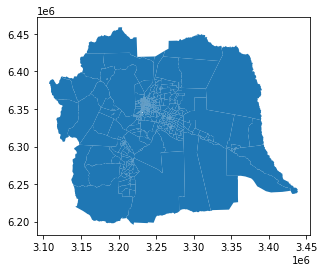

In [3]:
mza.plot()

In [4]:
from libpysal.weights import Queen

w_queen = Queen.from_dataframe(mza)

In [5]:
w_queen.mean_neighbors,w_queen.max_neighbors,w_queen.min_neighbors

(6.282368249837345, 21, 1)

In [6]:
w_queen.islands

[]

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

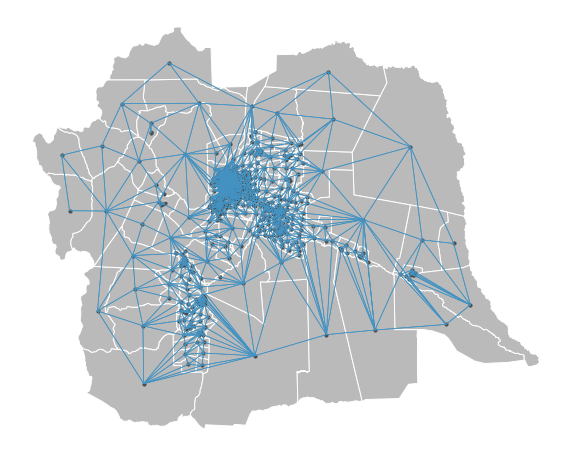

In [7]:
from splot.libpysal import plot_spatial_weights
plot_spatial_weights(w_queen,mza)

In [8]:
mza.columns

Index(['POLY_ID', 'link', 'mendo_d', 'toponm_', 'varon', 'mujer', 'totlpbl',
       'hogares', 'vivndsp', 'vv_prt_', 'Educa', 'Secu', 'Sup', 'Prim',
       'SinEst', 'Hombre', 'Muni', 'Frac', 't_activ', 't_emple', 't_descp',
       'T_cp_pr', 'Cant', 'Arg', 'Ext', 'Alfab', 'Computa', 'Edad0', 'Edad1',
       'Edad2', 'Edad3', 'Edad4', 'Edad5', 'Edad6', 'Edad', 'No_asst', 'Aband',
       'Asiste', 'Edd_cmp', 'Bajo_st', 'PrsMy15', 'PrsMy25', 'IndBE',
       'Alto_st', 'IndAE', 'Alt_st2', 'PrsMy18', 'IndAE2', 'Jov_bnd',
       'PrsMn25', 'IndJA', 'Canth', 'IndHac', 'Asistxh', 'otr_fam', 'Serv_dm',
       'Hijs_sc', 'Jefe_Oc', 'Cony_oc', 'Edad_jf', 'Jef_cmp', 'Dsmp_hg',
       'Ocp_hgr', 'difedad', 'NBI', 'Cantv', 'v_partc', 'Casa_v', 'Dpto_v',
       'Mat_cl1', 'Mat_cl2', 'Mat_cl3', 'Mat_cl4', 'Srv_sts', 'Srv_bsc',
       'Srv_nsf', 'Cns_sts', 'Cns_bsc', 'Cns_nsf', 'QT1', 'QT2', 'geometry'],
      dtype='object')

In [9]:
mza_est = mza[["Bajo_st", "Alto_st", "Alt_st2", "Jov_bnd","geometry"]]

<AxesSubplot:>

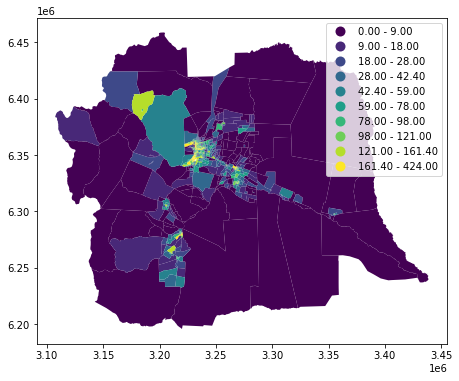

In [18]:
mza_est.plot(column = 'Alto_st', scheme = "Quantiles", k = 10, legend = True, figsize = (10,6))

In [39]:
import pysal as ps
from sklearn.cluster import KMeans, AgglomerativeClustering

In [73]:
variables = ["Bajo_st", "Alto_st", "Alt_st2", "Jov_bnd"]
mza = mza_est[["Bajo_st", "Alto_st", "Alt_st2", "Jov_bnd"]]
kmeans = KMeans(n_clusters = 30)
np.random.seed(56)
grupos = kmeans.fit(mza)

In [56]:
grupos.labels_

1537

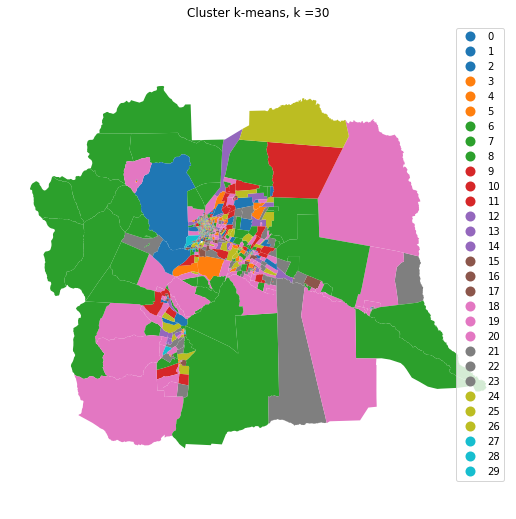

In [60]:
mza_est['k30cls'] = grupos.labels_
f,ax = plt.subplots(1, figsize = (9,9))
mza_est.plot(column = 'k30cls', categorical = True, legend = True, linewidth = 0, ax = ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Cluster k-means, k =30')
plt.show()


In [63]:
import sklearn.metrics as metrics

In [69]:
metrics.homogeneity_score([0,2],[0,10])

1.0

In [76]:
metrics.mean_squared_error(mza_est[mza_est['k30cls'] ==5][variables])

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

In [78]:
mza_est[mza_est['k30cls'] ==5][variables].mean()

Bajo_st    453.434783
Alto_st     42.478261
Alt_st2     44.521739
Jov_bnd    133.521739
dtype: float64